In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
df_train = pd.read_csv("data/prepared_train.csv", index_col="Id", keep_default_na=False)
df_train

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,LotArea,LotShape,LotConfig_FR2,LotConfig_Inside,...,GarageType_2Types,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,0,0,0,0,8450,2,0,1,...,0,2003,1,2,548,0,61,2,2008,208500
2,20,1,0,0,0,0,9600,2,1,0,...,0,1976,1,2,460,298,0,5,2007,181500
3,60,1,0,0,0,0,11250,1,0,1,...,0,2001,1,2,608,0,42,9,2008,223500
4,70,1,0,0,0,0,9550,1,0,0,...,0,1998,0,3,642,0,35,2,2006,140000
5,60,1,0,0,0,0,14260,1,1,0,...,0,2000,1,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,1,0,0,0,0,7917,2,0,1,...,0,1999,1,2,460,0,40,8,2007,175000
1457,20,1,0,0,0,0,13175,2,0,1,...,0,1978,0,2,500,349,0,2,2010,210000
1458,70,1,0,0,0,0,9042,2,0,1,...,0,1941,1,1,252,0,60,5,2010,266500


In [104]:
df_test = pd.read_csv("data/prepared_test.csv", index_col="Id", keep_default_na=False)
df_test

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,LotArea,LotShape,LotConfig_FR2,LotConfig_Inside,...,GarageType_2Types,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20.0,0.0,0.0,0.0,0.0,1.0,11622.0,2.0,0.0,1.0,...,0.0,1961.0,0.0,1.0,730.0,140.0,0.0,6.0,2010.0,169277.052498
1462,20.0,1.0,0.0,0.0,0.0,0.0,14267.0,1.0,0.0,0.0,...,0.0,1958.0,0.0,1.0,312.0,393.0,36.0,6.0,2010.0,187758.393989
1463,60.0,1.0,0.0,0.0,0.0,0.0,13830.0,1.0,0.0,1.0,...,0.0,1997.0,2.0,2.0,482.0,212.0,34.0,3.0,2010.0,183583.683570
1464,60.0,1.0,0.0,0.0,0.0,0.0,9978.0,1.0,0.0,1.0,...,0.0,1998.0,2.0,2.0,470.0,360.0,36.0,6.0,2010.0,179317.477511
1465,120.0,1.0,0.0,0.0,0.0,0.0,5005.0,1.0,0.0,1.0,...,0.0,1992.0,1.0,2.0,506.0,0.0,82.0,1.0,2010.0,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160.0,0.0,1.0,0.0,0.0,0.0,1936.0,2.0,0.0,1.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,6.0,2006.0,167081.220949
2916,160.0,0.0,1.0,0.0,0.0,0.0,1894.0,2.0,0.0,1.0,...,0.0,1970.0,0.0,1.0,286.0,0.0,24.0,4.0,2006.0,164788.778231
2917,20.0,1.0,0.0,0.0,0.0,0.0,20000.0,2.0,0.0,1.0,...,0.0,1960.0,0.0,2.0,576.0,474.0,0.0,9.0,2006.0,219222.423400


# Split into train/test sets

In [105]:
x_train = df_train.drop(columns="SalePrice", inplace=False).to_numpy()
x_train

array([[  60,    1,    0, ...,   61,    2, 2008],
       [  20,    1,    0, ...,    0,    5, 2007],
       [  60,    1,    0, ...,   42,    9, 2008],
       ...,
       [  70,    1,    0, ...,   60,    5, 2010],
       [  20,    1,    0, ...,    0,    4, 2010],
       [  20,    1,    0, ...,   68,    6, 2008]])

In [106]:
y_train = df_train["SalePrice"].to_numpy()
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [107]:
x_test = df_test.drop(columns="SalePrice", inplace=False).to_numpy()
x_test

array([[2.000e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [2.000e+01, 1.000e+00, 0.000e+00, ..., 3.600e+01, 6.000e+00,
        2.010e+03],
       [6.000e+01, 1.000e+00, 0.000e+00, ..., 3.400e+01, 3.000e+00,
        2.010e+03],
       ...,
       [2.000e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 9.000e+00,
        2.006e+03],
       [8.500e+01, 1.000e+00, 0.000e+00, ..., 3.200e+01, 7.000e+00,
        2.006e+03],
       [6.000e+01, 1.000e+00, 0.000e+00, ..., 4.800e+01, 1.100e+01,
        2.006e+03]])

In [108]:
y_test = df_test["SalePrice"].to_numpy()
y_test

array([169277.0524984 , 187758.39398877, 183583.68356955, ...,
       219222.42340006, 184924.279659  , 187741.86665748])

In [109]:
y_train = np.reshape(y_train, [y_train.shape[0], 1])    # convert (num,) into (num,1)
y_test = np.reshape(y_test, [y_test.shape[0], 1])       # helpful when broadcasting

# Linear Regression using RMSLE cost function

In [110]:
m, n = x_train.shape
epochs = 5*10**4

alpha = 10**(-11)
W = np.random.random([n, 1])  # weights
b = 1   # bias

Train cost at 0 = 188343.15997756523
Test cost at 0 = 171086.94438346618

Train cost at 5000 = 93379.37163888542
Test cost at 5000 = 50525.312499488784

Train cost at 10000 = 77055.74957413496
Test cost at 10000 = 33397.42335068112

Train cost at 15000 = 69104.61884563764
Test cost at 15000 = 24353.108782928073

Train cost at 20000 = 65335.8733998157
Test cost at 20000 = 20557.961140770436

Train cost at 25000 = 63467.056393647305
Test cost at 25000 = 19580.05991118419

Train cost at 30000 = 62417.94372451384
Test cost at 30000 = 19758.824916440713

Train cost at 35000 = 61717.15484288845
Test cost at 35000 = 20299.31196670075

Train cost at 40000 = 61166.83261258078
Test cost at 40000 = 20908.816622165912

Train cost at 45000 = 60685.26715714145
Test cost at 45000 = 21500.513532595272



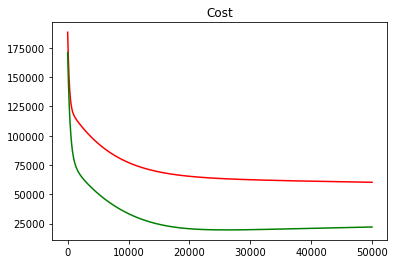

In [111]:
train_cost = []
test_cost = []
for epoch in range(epochs):
    # test validation
    h_test = x_test.dot(W) + b
    C_test = np.sqrt(np.sum((h_test - y_test)**2)/y_test.shape[0])
    test_cost.append(C_test)
    
    # forward propagation
    h = x_train.dot(W) + b
    C = np.sqrt(np.sum((h - y_train)**2)/m)   # RMSLE
    
    train_cost.append(C)
    if epoch % (epochs/10) == 0:     # display only 10 times; adaptive to any epochs number
        print(f"Train cost at {epoch} = {C}")
        print(f"Test cost at {epoch} = {C_test}\n")
    
    grad = x_train.T.dot(h-y_train)/m
    W = W - alpha*grad
    b = b - alpha*np.sum(grad)
    
plt.title("Cost")
plt.plot(range(epochs), train_cost, "r-")
plt.plot(range(epochs), test_cost, "g-")
plt.show()

In [112]:
ex = 300     # index of example house
pred = np.sum(x_test[ex].dot(W) + b)
pred

185129.01774762338

In [113]:
y_test[ex][0]

182347.363042264

In [114]:
y_test[ex][0] - pred

-2781.6547053593677

# Submission

In [115]:
y_test = x_test.dot(W) + b
y_test.shape

(1459, 1)

In [116]:
submission_df = pd.DataFrame(data=y_test, index=df_test.index, columns=["SalePrice",])
submission_df

,SalePrice
Id,
1461,165833.954529
1462,190254.524337
1463,188904.494597
1464,184037.047444
1465,178253.302282
...,...
2915,119712.846898
2916,149092.332110
2917,193713.749970


In [117]:
true_vals = pd.read_csv("data/sample_submission.csv", index_col="Id", keep_default_na=False)
true_vals

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2915,167081.220949
2916,164788.778231
2917,219222.423400


In [118]:
submission_df.to_csv("data/submission.csv")

# RMSLE score :

In [119]:
np.sqrt(np.sum((y_test - true_vals.to_numpy())**2)/y_test.shape[0])

22058.134601250946